# Task 1: Student Score Prediction (Level 1)

## Step 1: Load and Explore Data

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

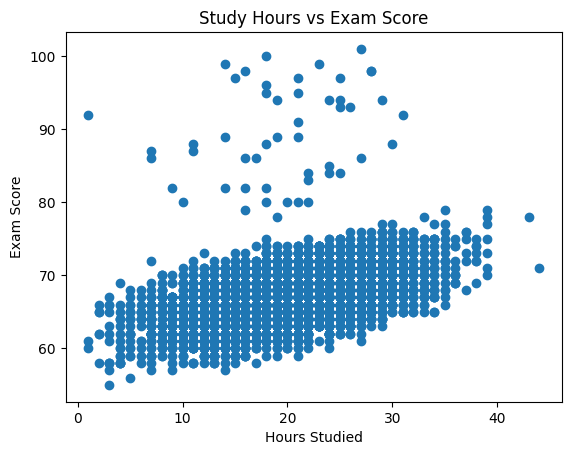

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv('StudentPerformanceFactors.csv')  

# Basic exploration
print(df.head())
print(df.describe())
print(df.isnull().sum()) 

# Visualization: Scatter plot
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')
plt.show()

## Step 2: Data Cleaning and Preparation

In [7]:
# Handle missing values 
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

# Confirm no missings left
print(df.isnull().sum())  # Should all be 0 now

# Encode all categorical columns
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Features (X) and target (y)
X = df_encoded.drop('Exam_Score', axis=1)  # All columns except target
y = df_encoded['Exam_Score']

# Split into train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(X_train.shape, X_test.shape)  # Expect (5285, num_features), (1322, num_features)

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64
(5285, 27) (1322, 27)


## Step 3: Train Linear Regression Model

Mean Squared Error: 3.26
R² Score: 0.77


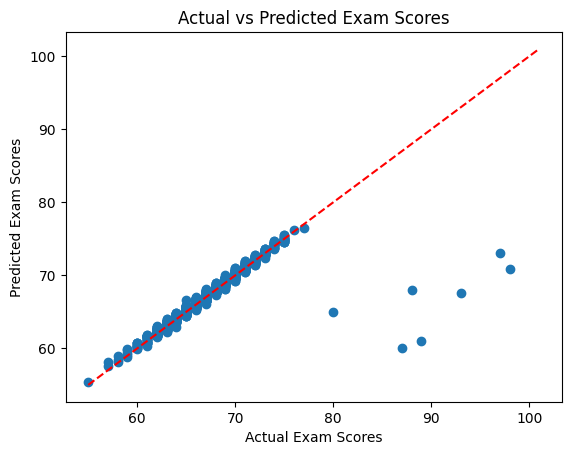

In [8]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')  # Expect ~1-2
print(f'R² Score: {r2:.2f}')  # Expect ~0.95+

# Visualize predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Ideal line
plt.savefig('actual_vs_predicted.png')  # Save for submission
plt.show()

## Bonus: Try Polynomial Regression

In [9]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)
print(f'Polynomial MSE: {poly_mse:.2f}, R²: {poly_r2:.2f}')  # Compare to linear

# Feature Experiment: Remove 'Sleep_Hours'
X_no_sleep = X.drop('Sleep_Hours', axis=1)
X_ns_train, X_ns_test, y_ns_train, y_ns_test = train_test_split(X_no_sleep, y, test_size=0.2, random_state=42)
model_no_sleep = LinearRegression()
model_no_sleep.fit(X_ns_train, y_ns_train)
y_ns_pred = model_no_sleep.predict(X_ns_test)
ns_mse = mean_squared_error(y_ns_test, y_ns_pred)
ns_r2 = r2_score(y_ns_test, y_ns_pred)
print(f'No Sleep Hours MSE: {ns_mse:.2f}, R²: {ns_r2:.2f}')  # See if performance drops

Polynomial MSE: 3.57, R²: 0.75
No Sleep Hours MSE: 3.25, R²: 0.77
